In [1]:
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 10 # Figure title size
})

In [2]:
df = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Background_var.nc').sel(time=['2018-02-01T00:00:00.000000000','2018-08-01T00:00:00.000000000'])
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(65,79)).sel(X=slice(-30,10))
depth_notZero = depth
depth = depth.where(depth > 0, np.nan)

df2 = df.sel(X=slice(-22,5)).sel(Y=72.5, method='nearest')

od = ospy.OceanDataset(df2)
od = od.compute.potential_density_anomaly()
od.dataset

Computing potential density anomaly using the following parameters: {'eq_state': 'mdjwf'}.


<xarray.Dataset> Size: 1GB
Dimensions:    (Z: 216, Zp1: 217, Zu: 216, Zl: 216, X: 558, Xp1: 766, Yp1: 629,
                time: 2, time_midp: 11)
Coordinates: (12/18)
  * Z          (Z) float64 2kB -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1        (Zp1) float64 2kB 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu         (Zu) float64 2kB -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl         (Zl) float64 2kB 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
  * X          (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 4.813 4.879 4.945
    Y          float64 8B 72.5
    ...         ...
  * time       (time) datetime64[ns] 16B 2018-02-01 2018-08-01
    YU         (Xp1) float64 6kB ...
    XU         (Xp1) float64 6kB ...
    YV         (Yp1, X) float64 3MB ...
    XV         (Yp1, X) float64 3MB ...
  * time_midp  (time_midp) datetime64[ns] 88B 2017-09-16 ... 2018-07-16T12:00:00
Data variables:
    U          (time, Z, Xp1) float64 3MB ...
    V          (time, Z, Yp1, X) float64 1GB ...
    Temp       (time, Z, X) float64 2MB ...
    S          (time, Z, X) float64 2MB ...
    Eta        (time, X) float64 9kB ...
    MXLDEPTH   (time, X) float64 9kB ...
    SIarea     (time, X) float64 9kB ...
    SIheff     (time, X) float64 9kB ...
    Sigma0     (time, Z, X) float64 2MB nan 25.48 25.49 25.51 ... nan nan nan
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

(72.0, 73.0)

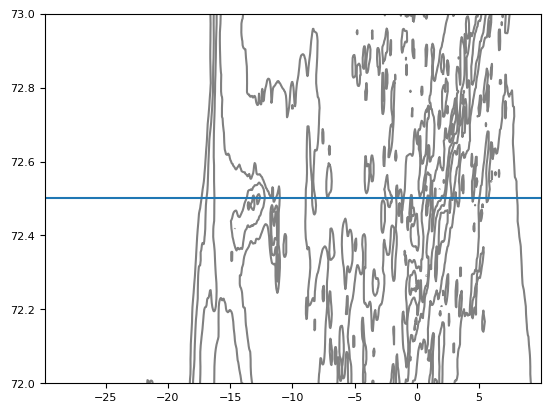

In [3]:
fig, ax = plt.subplots()
ax.contour(depth.X,depth.Y,depth, colors='Grey')
ax.plot(depth.X,[72.5 for Y in depth.X])
ax.set_ylim(72,73)

In [4]:
SA = df.S
SA = SA.sel(Y=72.5, method='nearest').sel(X=slice(-22,5))
TP = df.Temp
TP = TP.sel(Y=72.5, method='nearest').sel(X=slice(-22,5))
Si = od.dataset.Sigma0

In [5]:
bathymetry = -depth.sel(Y=72.5, method='nearest').sel(X=slice(-22,5))
bathymetry

<xarray.DataArray 'Depth' (X: 558)> Size: 4kB
array([           nan,   -77.        ,  -147.87933415,  -217.61680399,
        -227.        ,  -208.        ,  -189.        ,  -189.        ,
        -204.53175433,  -208.        ,  -217.5       ,  -223.0098252 ,
        -227.        ,  -227.        ,  -227.        ,  -236.5       ,
        -255.5       ,  -280.17759223,  -303.        ,  -322.        ,
        -338.51904575,  -341.        ,  -341.        ,  -340.63338312,
        -337.29101649,  -336.5106833 ,  -339.43028933,  -350.5       ,
        -356.13677249,  -351.78237931,  -319.71355521,  -298.29221158,
        -259.01490701,  -227.        ,  -221.052594  ,  -217.5       ,
        -208.        ,  -208.        ,  -206.72300872,  -206.30591337,
        -206.45851144,  -207.84880803,  -217.5       ,  -217.5       ,
        -217.5       ,  -217.5       ,  -221.04145057,  -227.        ,
        -227.        ,  -236.5       ,  -241.57643473,  -244.11416598,
        -246.        ,  -257.355316  ,  -264.98157794,  -265.        ,
        -274.5       ,  -274.5       ,  -274.5       ,  -265.        ,
        -265.        ,  -265.        ,  -263.11563945,  -261.24322701,
        -259.45552821,  -257.72510831,  -255.85293211,  -255.5       ,
        -246.        ,  -246.        ,  -244.87281274,  -245.26271606,
        -246.        ,  -246.        ,  -255.5       ,  -255.74890046,
        -258.83607296,  -260.80890039,  -260.52060133,  -256.69473364,
...
       -2336.        , -2310.545555  , -2250.5       , -2060.5       ,
       -1836.6558602 , -1721.62811106, -1566.5       , -1690.        ,
       -1986.48154889, -2013.        , -2013.        , -1880.        ,
       -1880.        , -2026.66525928, -2032.        , -2007.84233597,
       -2013.        , -1956.        , -1861.        , -1528.5       ,
       -1440.04451772, -1642.5       , -1737.5       , -1747.        ,
       -1747.        , -1756.5       , -1794.5       , -1804.        ,
       -1861.        , -2048.68468242, -2070.        , -2069.72741774,
       -2051.        , -2145.71985868, -2442.05217818, -2640.        ,
       -2636.47133909, -2564.        , -2763.5       , -2773.        ,
       -2652.53754622, -2502.88777247, -2865.30196232, -3058.        ,
       -3057.65526843, -2829.91272979, -2766.70164387, -2564.        ,
       -2459.5       , -2535.5       , -2602.        , -2621.        ,
       -2615.41436841, -2561.16607642, -2197.31682828, -2165.        ,
       -2124.21644869, -2117.5       , -2089.        , -2222.        ,
       -2222.        , -2317.        , -2371.75112938, -2374.        ,
       -2364.5       , -2346.95102778, -2279.        , -2234.56521246,
       -2176.89959797, -2450.        , -2564.        , -2558.70677223,
       -2269.5       , -2165.        , -2136.5       , -2332.26209521,
       -2373.76519869, -2374.        ])
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 4.813 4.879 4.945
    Y        float64 8B 72.5
    XC       (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 4.813 4.879 4.945
    YC       (X) float64 4kB 72.5 72.5 72.5 72.5 72.5 ... 72.5 72.5 72.5 72.5
Attributes:
    description:    fluid thickness in r coordinates (at rest)
    standard_name:  ocean_depth
    long_name:      ocean depth
    units:          m
    coordinate:     XC YC

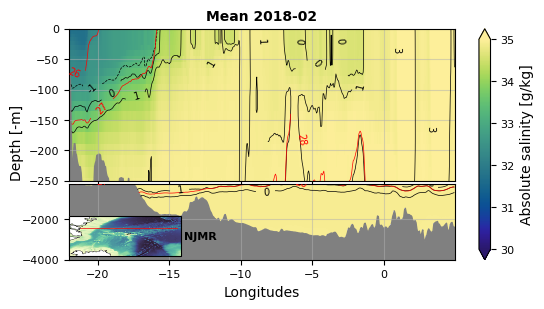

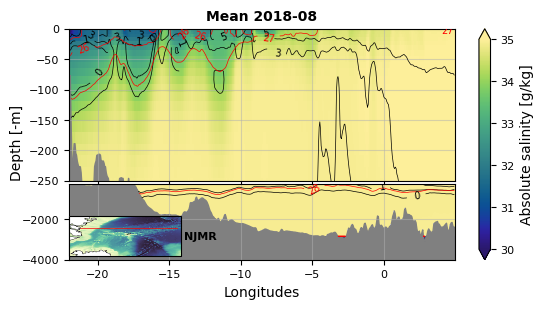

In [6]:
# Overview figure
for data in zip(SA,TP,Si):
    fig, ax = plt.subplot_mosaic([[0],[1]],
                                figsize=(6.2217,3), gridspec_kw={'height_ratios': [2/3, 1/3]}, sharex=True)
    fig.subplots_adjust(hspace=0.025)
    cmap = cmo.haline

    mesh = ax[0].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    ax[1].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    
    cbar = fig.colorbar(mesh, ax=[ax[0],ax[1]], extend='both')
    cbar.set_label('Absolute salinity [g/kg]')
    
    cntr1 = ax[0].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)
    cntr2 = ax[1].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)

    ax[0].clabel(cntr1, fmt="%2.0f", use_clabeltext=True,fontsize=7)
    ax[1].clabel(cntr2, fmt="%2.0f", use_clabeltext=True, fontsize=7)

    cntr1 = ax[0].contour(data[2].X,data[2].Z, data[2], [25,26,27,28], colors='red', linewidths=0.5)
    cntr2 = ax[1].contour(data[2].X,data[2].Z, data[2], [25,26,27,28], colors='red', linewidths=0.5)

    ax[0].clabel(cntr1, fmt="%2.0f", use_clabeltext=True,fontsize=7)
    ax[1].clabel(cntr2, fmt="%2.0f", use_clabeltext=True, fontsize=7)

    ax[0].fill_between(bathymetry.X,bathymetry,-4000, color='grey')
    ax[1].fill_between(bathymetry.X,bathymetry,-4000, color='grey')

    ax[1].set_xlabel('Longitudes')
    # Add a common y-axis label in the center of the figure
    fig.text(0.03, 0.5, 'Depth [-m]', fontsize=10, va='center', rotation='vertical')
    ax[0].set_title(f'Mean {str(data[0].time.values)[:7]}',fontweight='bold')

    ax[1].annotate(text='NJMR',xy=[-14,-3000],fontsize=8,fontweight='bold')

    inset_ax = fig.add_axes([0.125, 0.065, 0.18, 0.25], projection=ccrs.PlateCarree())
    inset_ax.pcolormesh(depth.X, depth.Y, depth, cmap=cmo.deep, transform=ccrs.PlateCarree())
    inset_ax.plot(bathymetry.X,[bathymetry.Y for X in bathymetry.X],color='red',linewidth=0.5, transform=ccrs.PlateCarree())
    inset_ax.contour(depth_notZero.X,depth_notZero.Y,depth_notZero,[0],colors='black', linewidths=0.25, transform=ccrs.PlateCarree())
    inset_ax.set_extent([-25, 6, 65, 76], crs=ccrs.PlateCarree())

    ax[0].set_ylim(-250,0)
    ax[1].set_ylim(-4000,-250)
    ax[0].grid(alpha=0.5)
    ax[1].grid(alpha=0.5)

    fig.savefig(f'/nird/home/ekv036/MSc/Fig/Vertical/VerticalSA{str(data[0].time.values)[:7]}',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches='tight',pad_inches=0.25)

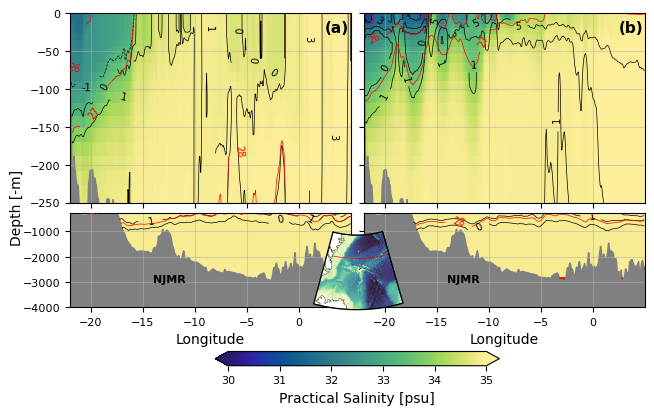

In [7]:
# Vertical Plot
fig, ax  = plt.subplot_mosaic([[0,10],[1,11]],figsize=(6.2217,4), gridspec_kw={'height_ratios': [2/3, 1/3]}, sharex=True,layout='constrained')

ax[10].sharey(ax[0])
ax[11].sharey(ax[1])

for i,data in enumerate(zip(SA,TP,Si)):
    cmap = cmo.haline

    mesh = ax[i*10].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    ax[i*10+1].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    
    cntr1 = ax[i*10].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)
    cntr2 = ax[i*10+1].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)

    ax[i*10].clabel(cntr1, fmt="%2.0f", use_clabeltext=True,fontsize=7)
    ax[i*10+1].clabel(cntr2, fmt="%2.0f", use_clabeltext=True, fontsize=7)

    cntr1 = ax[i*10].contour(data[2].X,data[2].Z, data[2], [25,26,27,28], colors='red', linewidths=0.5)
    cntr2 = ax[i*10+1].contour(data[2].X,data[2].Z, data[2], [25,26,27,28], colors='red', linewidths=0.5)

    ax[i*10].clabel(cntr1, fmt="%2.0f", use_clabeltext=True,fontsize=7)
    ax[i*10+1].clabel(cntr2, fmt="%2.0f", use_clabeltext=True, fontsize=7)

    ax[i*10].fill_between(bathymetry.X,bathymetry,-4000, color='grey')
    ax[i*10+1].fill_between(bathymetry.X,bathymetry,-4000, color='grey')

    ax[i*10+1].set_xlabel('Longitude')
    # pos = ['(a)','(b)']
    # ax[i*10].set_title(f'{pos[i]} Mean {str(data[0].time.values)[:7]}',fontweight='bold')

    ax[i*10+1].annotate(text='NJMR',xy=[-14,-3000],fontsize=8,fontweight='bold')

    ax[i*10].set_ylim(-250,0)
    ax[i*10+1].set_ylim(-4000,-250)
    ax[i*10].grid(alpha=0.5)
    ax[i*10+1].grid(alpha=0.5)

inset_ax = fig.add_axes([0.465, 0.24, 0.15, 0.2], projection=ccrs.NorthPolarStereo(central_longitude=-10))
inset_ax.pcolormesh(depth.X, depth.Y, depth, cmap=cmo.deep, transform=ccrs.PlateCarree())
inset_ax.plot(bathymetry.X,[bathymetry.Y for X in bathymetry.X],color='red',linewidth=0.5, transform=ccrs.PlateCarree())
inset_ax.contour(depth_notZero.X,depth_notZero.Y,depth_notZero,[0],colors='black', linewidths=0.25, transform=ccrs.PlateCarree())
inset_ax.set_extent([-25, 6, 64, 76], crs=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
extent = [-25+10, 6+10, 65, 76]
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=inset_ax.transData, edgecolor='black', facecolor='none')
inset_ax.add_patch(patch)

# Set the boundary using the transformed path
inset_ax.set_boundary(patch.get_path(), transform=inset_ax.transData)

fig.text(-0.02, 0.5, 'Depth [-m]',fontsize=10, va='center', rotation='vertical')
cbar = fig.colorbar(mesh, ax=[ax[1],ax[11]],orientation='horizontal', extend='both')
cbar.set_label('Practical Salinity [psu]')

ax[0].annotate('(a)',xy=[2.5,-25],fontweight='bold')
ax[10].annotate('(b)',xy=[2.5,-25],fontweight='bold')

for ax in [ax[10], ax[11]]:
    ax.yaxis.set_tick_params(labelleft=False)

fig.get_layout_engine().set(w_pad=0,h_pad=0.02,hspace=0.005, wspace=0.025)

fig.savefig(f'/nird/home/ekv036/MSc/Fig/Vertical/Vertical',dpi=300, facecolor='w', edgecolor='w',
        orientation='landscape', format=None,
        transparent=False, bbox_inches='tight',pad_inches=0.25)


In [8]:
display(Si)

<xarray.DataArray 'Sigma0' (time: 2, Z: 216, X: 558)> Size: 2MB
array([[[        nan, 25.48309726, 25.49266388, ..., 27.85251201,
         27.8497616 , 27.84846449],
        [        nan, 25.48371516, 25.49359393, ..., 27.85182686,
         27.84908671, 27.84773412],
        [        nan, 25.48468001, 25.49944549, ..., 27.85152602,
         27.848835  , 27.84745004],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan, 23.82382685, 23.84787859, ..., 26.95617611,
         26.97735195, 26.98189501],
        [        nan, 23.82439051, 23.85201617, ..., 27.06816857,
         27.07362598, 27.08021464],
        [        nan, 23.91280987, 24.0005218 , ..., 27.14314701,
         27.14440641, 27.14854866],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * Z        (Z) float64 2kB -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
  * X        (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 4.813 4.879 4.945
    Y        float64 8B 72.5
    XC       (X) float64 4kB ...
    YC       (X) float64 4kB ...
  * time     (time) datetime64[ns] 16B 2018-02-01 2018-08-01
Attributes:
    units:                kg/m^3
    long_name:            potential density anomaly
    OceanSpy_parameters:  {'eq_state': 'mdjwf'}

/tmp/ipykernel_3294893/1065833501.py:74: UserWarning: Adding colorbar to a different Figure <Figure size 622.17x400 with 4 Axes> than <Figure size 622.17x400 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(mesh, ax=[ax[1],ax[11]],orientation='horizontal', extend='both')


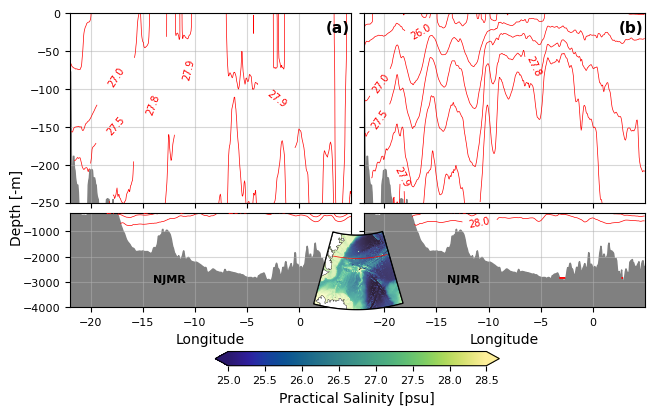

In [35]:
# Vertical Plot
fig, ax  = plt.subplot_mosaic([[0,10],[1,11]],figsize=(6.2217,4), gridspec_kw={'height_ratios': [2/3, 1/3]}, sharex=True,layout='constrained')

ax[10].sharey(ax[0])
ax[11].sharey(ax[1])

for i,data in enumerate(zip(SA,TP,Si)):
    cmap = cmo.haline

    # mesh = ax[i*10].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    # ax[i*10+1].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    
    # cntr1 = ax[i*10].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)
    # cntr2 = ax[i*10+1].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)

    # ax[i*10].clabel(cntr1, fmt="%2.0f", use_clabeltext=True,fontsize=7)
    # ax[i*10+1].clabel(cntr2, fmt="%2.0f", use_clabeltext=True, fontsize=7)

    cntr1 = ax[i*10].contour(data[2].X,data[2].Z, data[2], [25,26,27,27.5,27.8,27.9,28], colors='red', linewidths=0.5)
    cntr2 = ax[i*10+1].contour(data[2].X,data[2].Z, data[2], [25,26,27,27.5,27.8,27.9,28], colors='red', linewidths=0.5)

    ax[i*10].clabel(cntr1, fmt="%2.1f", use_clabeltext=True,fontsize=7)
    ax[i*10+1].clabel(cntr2, fmt="%2.1f", use_clabeltext=True, fontsize=7)

    ax[i*10].fill_between(bathymetry.X,bathymetry,-4000, color='grey')
    ax[i*10+1].fill_between(bathymetry.X,bathymetry,-4000, color='grey')

    ax[i*10+1].set_xlabel('Longitude')
    # pos = ['(a)','(b)']
    # ax[i*10].set_title(f'{pos[i]} Mean {str(data[0].time.values)[:7]}',fontweight='bold')

    ax[i*10+1].annotate(text='NJMR',xy=[-14,-3000],fontsize=8,fontweight='bold')

    ax[i*10].set_ylim(-250,0)
    ax[i*10+1].set_ylim(-4000,-250)
    ax[i*10].grid(alpha=0.5)
    ax[i*10+1].grid(alpha=0.5)

inset_ax = fig.add_axes([0.465, 0.24, 0.15, 0.2], projection=ccrs.NorthPolarStereo(central_longitude=-10))
inset_ax.pcolormesh(depth.X, depth.Y, depth, cmap=cmo.deep, transform=ccrs.PlateCarree())
inset_ax.plot(bathymetry.X,[bathymetry.Y for X in bathymetry.X],color='red',linewidth=0.5, transform=ccrs.PlateCarree())
inset_ax.contour(depth_notZero.X,depth_notZero.Y,depth_notZero,[0],colors='black', linewidths=0.25, transform=ccrs.PlateCarree())
inset_ax.set_extent([-25, 6, 64, 76], crs=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
extent = [-25+10, 6+10, 65, 76]
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=inset_ax.transData, edgecolor='black', facecolor='none')
inset_ax.add_patch(patch)

# Set the boundary using the transformed path
inset_ax.set_boundary(patch.get_path(), transform=inset_ax.transData)

fig.text(-0.02, 0.5, 'Depth [-m]',fontsize=10, va='center', rotation='vertical')
cbar = fig.colorbar(mesh, ax=[ax[1],ax[11]],orientation='horizontal', extend='both')
cbar.set_label('Practical Salinity [psu]')

ax[0].annotate('(a)',xy=[2.5,-25],fontweight='bold')
ax[10].annotate('(b)',xy=[2.5,-25],fontweight='bold')

for ax in [ax[10], ax[11]]:
    ax.yaxis.set_tick_params(labelleft=False)

fig.get_layout_engine().set(w_pad=0,h_pad=0.02,hspace=0.005, wspace=0.025)

fig.savefig(f'/nird/home/ekv036/MSc/Fig/Vertical/Vertical_density',dpi=300, facecolor='w', edgecolor='w',
        orientation='landscape', format=None,
        transparent=False, bbox_inches='tight',pad_inches=0.25)